# Step 1 - Import Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = {'2800': 'Kgs Lyngby', '2820': 'Gentofte', '2830': 'Virum', '2840': 'Holte', '2850': 'Nærum', '2900': 'Hellerup', '2920': 'Charlottenlund', '2930': 'Klampenborg', '2942': 'Skodsborg', '2950': 'Vedbæk', '3000': 'Helsingør', '3460': 'Birkerød'}
dataframes = []

for city in cities:
    filename = f'../data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

dataframes[10].head(5)


,Address,X,Y,Price,Type,Size,Squaremeter price,Energy class,Url
0,"Heimdalsvej 3A, 1.",56.034845,12.591295,1995000,Ejerlejlighed,68,29338,D,https://www.dingeo.dk/adresse/3000-helsing%C3%...
1,Højvænget 8,56.040647,12.600903,14995000,Villa,340,44102,C,https://www.dingeo.dk/adresse/3000-helsing%C3%...
2,Ribevej 4,56.027213,12.594296,5495000,Villa,169,32514,C,https://www.dingeo.dk/adresse/3000-helsing%C3%...
3,"Fiolgade 9C, 2.",56.033803,12.608923,3895000,Ejerlejlighed,159,24496,C,https://www.dingeo.dk/adresse/3000-helsing%C3%...
4,Valnøddevænget 14,56.019530,12.590993,6750000,Villa,161,41925,B,https://www.dingeo.dk/adresse/3000-helsing%C3%...


# Step 2 - Calculate and sort:
### average squaremeter price and number of units for all 12 cities

In [7]:
avg_all_cities = []
num_units_all_cities = []

for df in dataframes:
    average = df['Squaremeter price'].mean()
    num_units = len(df)
    avg_all_cities.append(average)
    num_units_all_cities.append(num_units)

# Sort cities by increasing average squaremeter price
sorted_avg_all_cities, sorted_cities, sorted_num_units = zip(*sorted(zip(avg_all_cities, cities.values(), num_units_all_cities)))

# Calculate raw average (does not take into account how many for sale in each city)
avg_raw = sum(sorted_avg_all_cities) / len(sorted_avg_all_cities)

sorted_avg_all_cities

(30957.925531914894,
 40188.21428571428,
 40788.083333333336,
 48314.94117647059,
 49971.15652173913,
 52721.41071428572,
 54221.34146341463,
 56880.294117647056,
 67744.69565217392,
 73065.90298507463,
 73884.48630136986,
 94536.73684210527)

# Step 3 - Plot

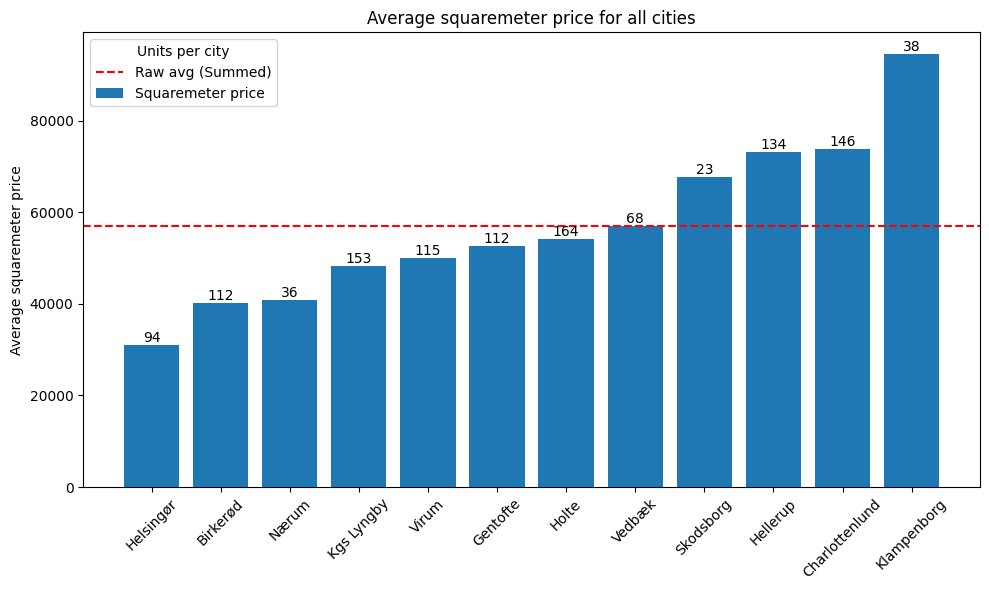

In [8]:

plt.figure(figsize=(10, 6))
plt.bar(sorted_cities, sorted_avg_all_cities, label='Squaremeter price')

# Add text labels with number of units above each bar
for i, (city, avg, num_units) in enumerate(zip(sorted_cities, sorted_avg_all_cities, sorted_num_units)):
    plt.text(i, avg, str(num_units), ha='center', va='bottom')

plt.axhline(y=avg_raw, color='red', linestyle='--', label='Raw avg (Summed)')
plt.ylabel('Average squaremeter price')
plt.title('Average squaremeter price for all cities')
plt.xticks(rotation=45)
plt.legend(title='Units per city', loc='upper left')

plt.tight_layout()
plt.show()

# Step 4 - sort data by city and housetypes

In [9]:
num_units = {}
sorted_cities = {}

plots_per_row = 3

for city in cities:
    filename = f'../data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

    num_units[city] = df.groupby('Type').size().to_dict()
    sorted_cities[city] = {house_type: count for house_type, count in sorted(num_units[city].items(), key=lambda x: x[1], reverse=True)}

first_key = next(iter(sorted_cities))
first_value = sorted_cities[first_key]
print(first_key, first_value)



2800 {'Villa': 74, 'Ejerlejlighed': 46, 'Rækkehus': 29, 'Villalejlighed': 4}


# Step 5 - Sort and plot housetypes by cities

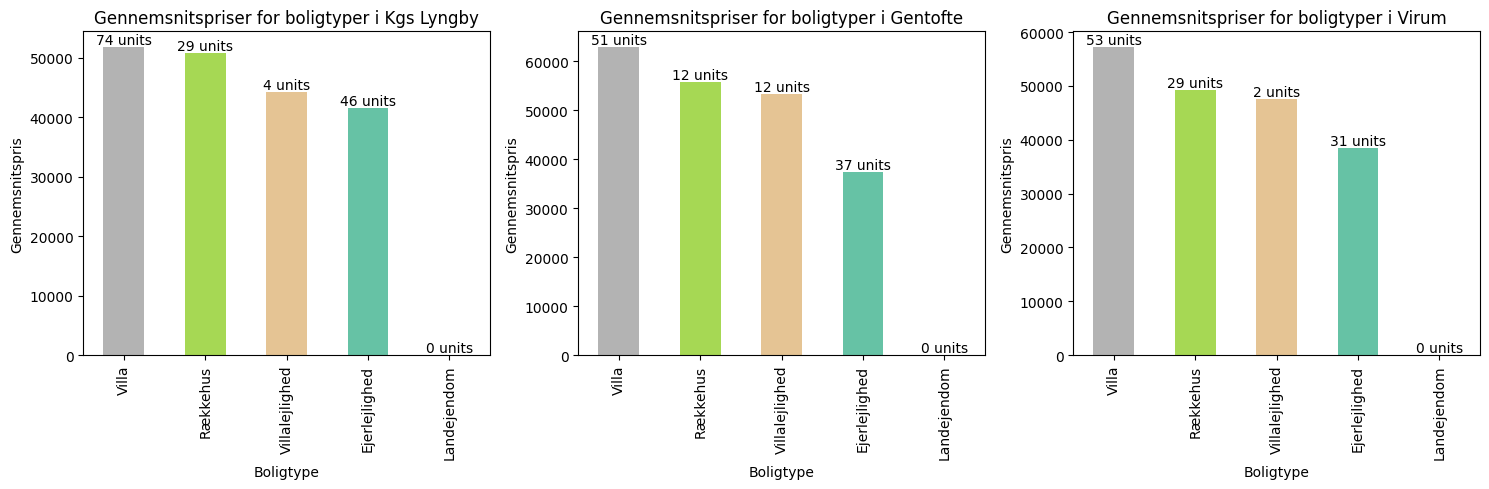

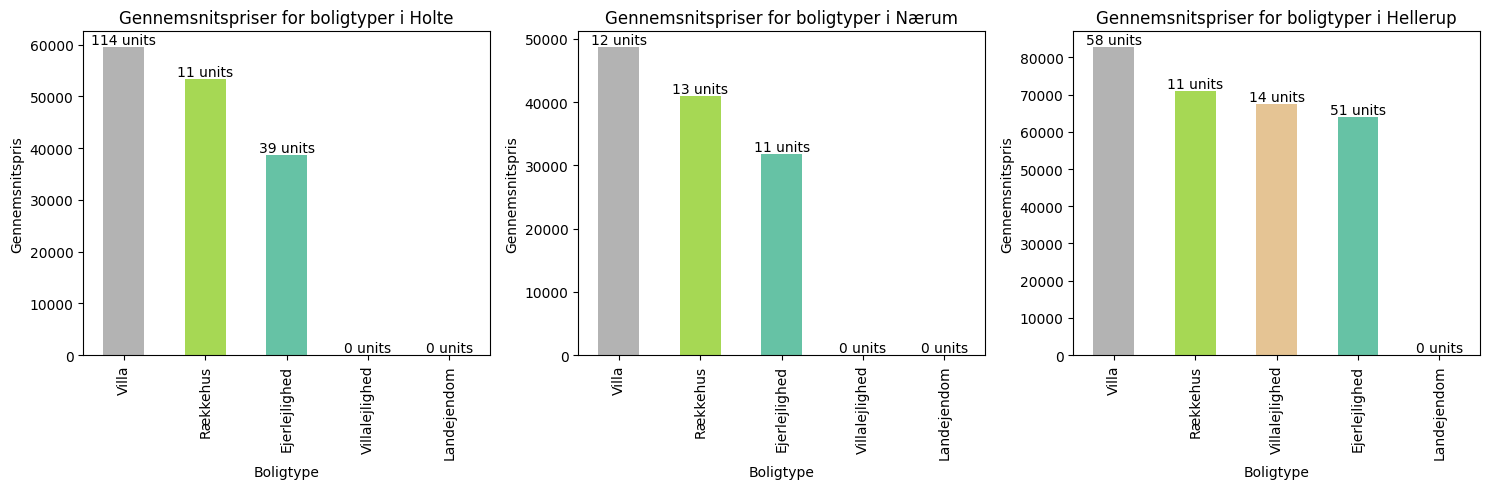

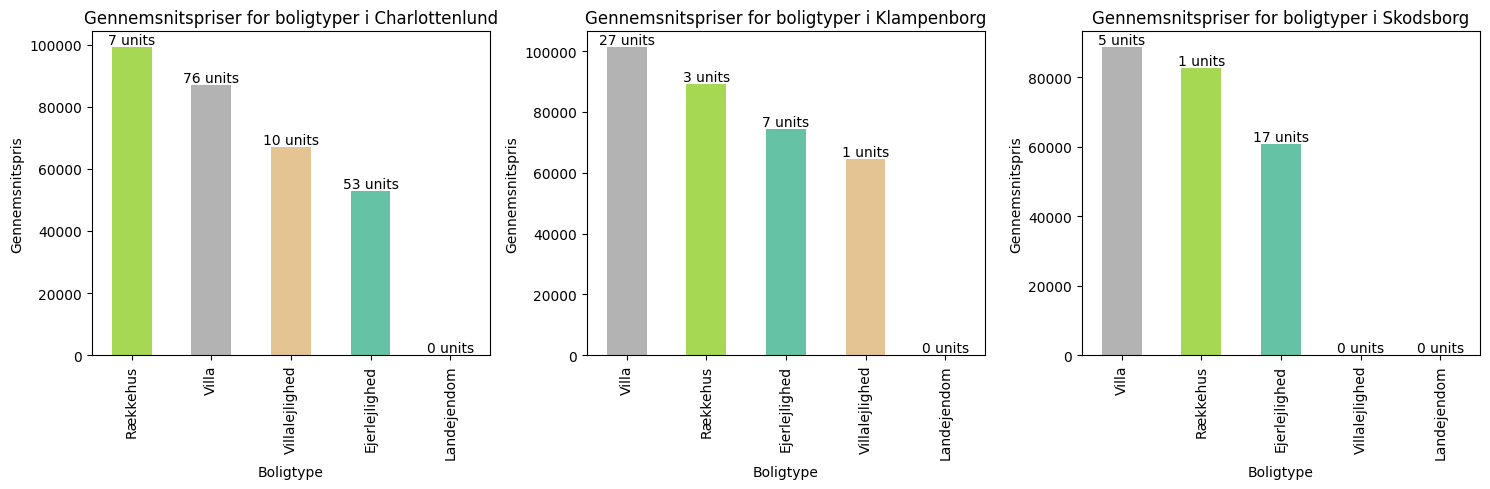

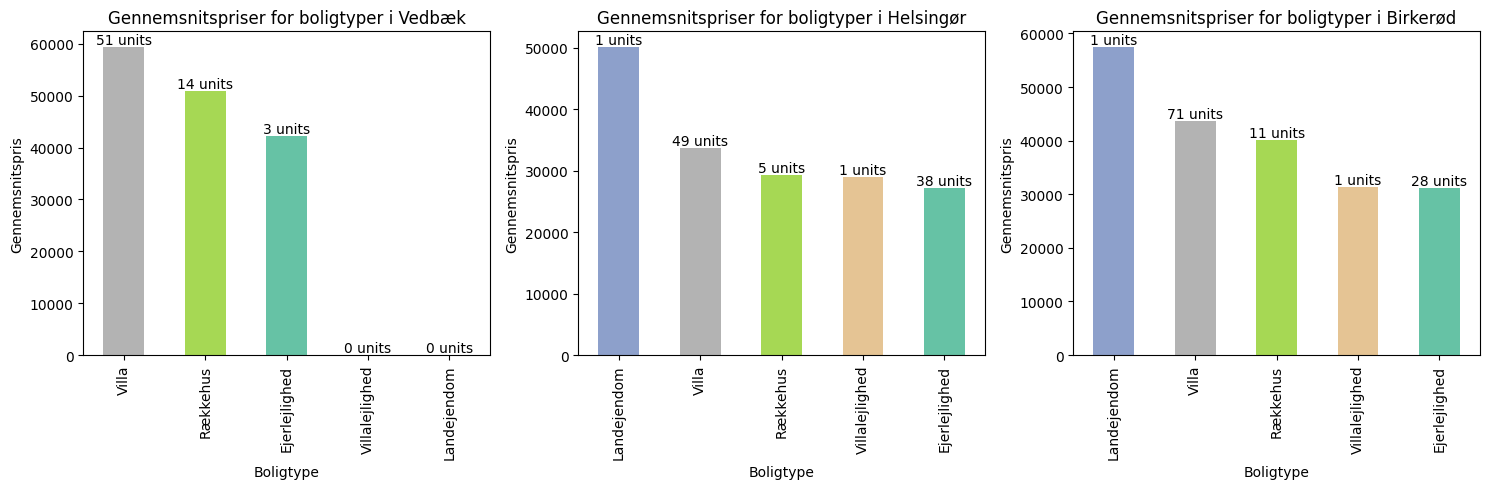

In [10]:
for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed', 'Landejendom', 'Rækkehus', 'Villalejlighed', 'Villa']

    for typ in all_types:
        if typ not in city_averages.index:
            city_averages[typ] = 0

    # Sort by average price and housetypes
    sorted_types = sorted(city_averages.items(), key=lambda x: (x[1], x[0]), reverse=True)  

    # Get housetypes from sorted_types
    sorted_types_names = [typ for typ, _ in sorted_types]  

    # Sort city_averages by sorted_types_names
    city_averages_sorted = city_averages.reindex(sorted_types_names)  

    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))

    row_index = i // plots_per_row
    col_index = i % plots_per_row

    # Assign color to bars by housetype
    color_palette = plt.get_cmap('Set2', len(all_types))
    colors = [color_palette(all_types.index(typ)) for typ in city_averages_sorted.index]

    city_averages_sorted.plot(kind='bar', ax=axs[col_index], color=colors)

    for j, (typ, unit) in enumerate(zip(city_averages_sorted.index, city_averages_sorted.values)):
        num_unit = sorted_cities[city].get(typ, 0)
        axs[col_index].text(j, unit, f'{num_unit} units', ha='center', va='bottom')

    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {cities[city]}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')

    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()

        plt.show()